In [2]:
import catboost
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import Pool, CatBoostRegressor, CatBoostClassifier
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pylab import rcParams

# matplotlib settings
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8
rcParams['font.size'] = 12
rcParams['axes.facecolor'] = 'white'

In [3]:
dataset = np.array([[1,4,5,6],[4,5,6,7],[30,40,50,60],[20,15,85,60]])
train_labels = [1.2,3.4,9.5,24.5]

In [4]:
model = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE', logging_level='Verbose') 

## CatBoost Example Usage

### CatBoost Classifier

In [4]:
# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 2, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))
# specify the training parameters 
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')
#train the model
model.fit(train_data, train_label, cat_features=[0,2,5])
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
# print("proba = ", preds_proba)

0: learn: 0.6636083	total: 73.4ms	remaining: 73.4ms
1: learn: 0.6322561	total: 83.6ms	remaining: 0us
('class = ', array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.]))


### CatBoostRegressor 

In [5]:
# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 1000, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))
# initialize Pool
train_pool = Pool(train_data, train_label, cat_features=[0,2,5])
test_pool = Pool(test_data, cat_features=[0,2,5]) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

0: learn: 291.0998	total: 4.61ms	remaining: 4.61ms
1: learn: 288.304	total: 8.26ms	remaining: 0us
[ 487.35892279  487.35892279  487.35892279  365.98114501  477.67558946
  477.67558946  477.67558946  477.67558946  487.35892279  487.35892279
  477.67558946  487.35892279  477.67558946  477.67558946  477.67558946
  477.67558946  477.67558946  487.35892279  477.67558946  477.67558946
  487.35892279  477.67558946  477.67558946  477.67558946  365.98114501
  477.67558946  477.67558946  477.67558946  477.67558946  477.67558946
  365.98114501  477.67558946  477.67558946  487.35892279  477.67558946
  477.67558946  477.67558946  477.67558946  477.67558946  487.35892279
  477.67558946  477.67558946  477.67558946  477.67558946  477.67558946
  477.67558946  477.67558946  477.67558946  477.67558946  477.67558946]


### Loading the data

In [5]:
train = pd.read_csv('../data/train.csv', index_col = 'id')
test = pd.read_csv('../data/test.csv', index_col = 'id')
train.head(2)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000


In [6]:
macro = pd.read_csv('../data/macro.csv')
macro.head(2)

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [7]:
df_train = pd.merge(train, macro, on = 'timestamp')
df_test = pd.merge(test, macro, on = 'timestamp')
df_train.head(2)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


### Data cleaning

In [8]:
df_train = df_train[df_train.full_sq < 5000]
df_train = df_train[df_train.life_sq < 5000]

### Exploratory Data Analysis
#### Year train/test distribution

In [9]:
def split_timestamp(df):
    df.timestamp = pd.to_datetime(df.timestamp)
    df['day'] = df.timestamp.dt.day
    df['month'] = df.timestamp.dt.month
    df['year'] = df.timestamp.dt.year
    df['quarter'] = np.ceil(df['month'] / 3).astype(int)

split_timestamp(df_train)
split_timestamp(df_test)

In [10]:
year_train_distr = df_train.groupby(by = 'year')['timestamp'].count()
year_test_distr = df_test.groupby(by = 'year')['timestamp'].count()

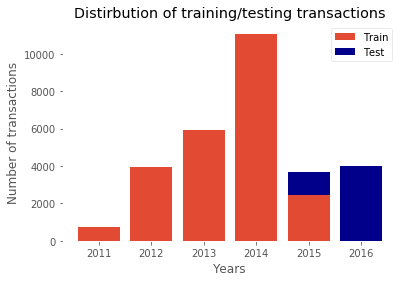

In [11]:
fig = plt.figure()
p1 = plt.bar(year_test_distr.index, year_test_distr, color='darkblue')
p2 = plt.bar(year_train_distr.index, year_train_distr)
plt.xlabel('Years')
plt.ylabel('Number of transactions')
plt.title('Distirbution of training/testing transactions')
plt.legend((p2[0], p1[0]), ('Train', 'Test'))
plt.show()

#### Median price changes

In [12]:
price_train_distr = df_train.groupby(['year', 'quarter'])['price_doc'].median().reset_index()
# price_train_distr['month_year'] = price_train_distr['month'].map(str) + price_train_distr['year']
price_train_distr['quarter_year'] = price_train_distr[['quarter', 'year']].apply(lambda (x, y): 
                                                                             str(x) + '-' + str(y), axis=1)
price_train_distr.head(2)

,year,quarter,price_doc,quarter_year
0,2011,3,5400000.0,3-2011
1,2011,4,5500000.0,4-2011


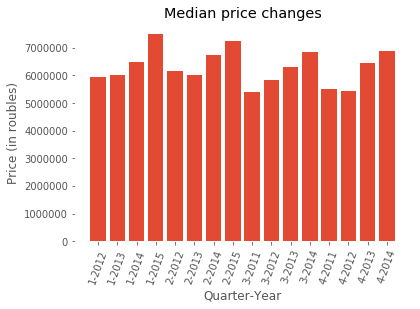

In [13]:
plt.figure()
plt.bar(price_train_distr.quarter_year, price_train_distr.price_doc)
plt.xticks(rotation=70)
plt.xlabel('Quarter-Year')
plt.ylabel('Price (in roubles)')
plt.title('Median price changes')
plt.show()

#### Price dependency on total and living areas in square meters

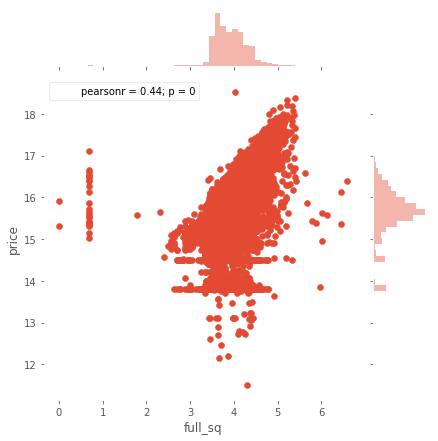

In [14]:
sns.jointplot(x=np.log1p(df_train.full_sq.values), y=np.log1p(df_train.price_doc.values)) \
   .set_axis_labels('full_sq', 'price')
plt.show()

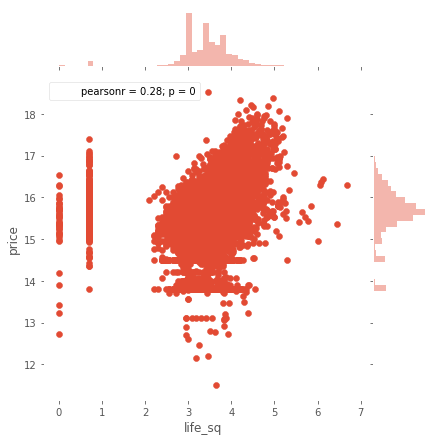

In [15]:
sns.jointplot(x=np.log1p(df_train.life_sq.values), y=np.log1p(df_train.price_doc.values)) \
   .set_axis_labels('life_sq', 'price')
plt.show()

#### Floor distribution

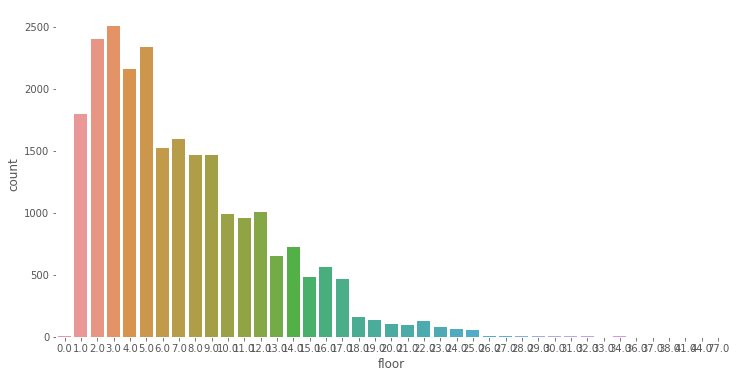

In [33]:
plt.figure(figsize = (12, 6))
sns.countplot(x="floor", data=df_train)
plt.show()

#### Price difference between flats for Investment and for OwnerOccupiers

In [17]:
invest = df_train[df_train.product_type == 'Investment']
owner = df_train[df_train.product_type == 'OwnerOccupier']

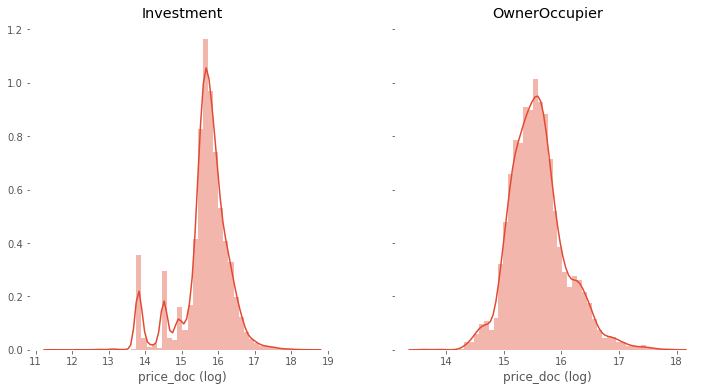

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
sns.distplot(np.log1p(invest.price_doc), ax = ax[0], axlabel = 'price_doc (log)')
sns.distplot(np.log1p(owner.price_doc), ax = ax[1], axlabel = 'price_doc (log)')
ax[0].set_title('Investment')
plt.ylabel()
ax[1].set_title('OwnerOccupier')
plt.show()